In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read csv data
psyco = pd.read_csv("psyco.csv")

In [3]:
#Taking a look at how the data looks like
psyco.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [4]:
psyco.shape

(1175, 19)

In [5]:
basic_stats1 = psyco.describe()
median = psyco.median()
mode = psyco.mode().iloc[0]
basic_stats1.loc['mode'] = mode
basic_stats1

C:\Users\nadon\AppData\Local\Temp\ipykernel_20088\2406501534.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = psyco.median()


,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000
mode,7.000000,9.000000,0.500000,1.000000,3.000000,0.500000,-0.500000,0.500000,0.500000,0.000000,0.000000,100.000000,1111.000000


In [6]:
#Make a copy of the original data to start data pre-processing. In case something goes wrong re-reading the file will not be needed
psyco1 = psyco.copy()
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [7]:
psyco1.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [8]:
psyco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [9]:
psyco1['line_of_work'].value_counts()

Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: int64

In [10]:
psyco1['occupation'].value_counts()

Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: occupation, dtype: int64

In [11]:
psyco1.groupby('occupation')['line_of_work'].value_counts()

occupation            line_of_work       
Working Professional  Teaching               217
                      Engineering            116
                      Management              66
                      Other                   40
                      Government Employee     35
                      Architect                3
                      APSPDCL                  1
                      Architecture             1
Name: line_of_work, dtype: int64

In [12]:
psyco1[psyco1['occupation'] != 'Working Professional']['line_of_work'].isnull().sum()

696

In [13]:
psyco1['line_of_work'].fillna('Other/not working', inplace=True)

In [14]:
psyco1['age'].value_counts()

19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: age, dtype: int64

In [15]:
psyco1['age'] = psyco1['age'].replace('Dec-18','0-18')

In [16]:
psyco1['age'].value_counts()

19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: age, dtype: int64

In [17]:
psyco1['occupation'] = psyco1['occupation'].replace('Medical Professional aiding efforts against COVID-19', 'Medical Professional')

In [18]:
psyco1.isnull().sum()

age               0
gender            0
occupation        0
line_of_work      0
time_bp           0
time_dp           0
travel_time       0
easeof_online     0
home_env          0
prod_inc          0
sleep_bal         0
new_skill         0
fam_connect       0
relaxed           0
self_time         0
like_hw           0
dislike_hw        0
prefer            0
certaindays_hw    0
dtype: int64

In [20]:
psyco1.shape

(1175, 19)

In [21]:
psyco1[['like_hw', 'dislike_hw']].value_counts()

like_hw  dislike_hw
100      1111          73
1000     1000          70
1110     101           52
1100     1111          50
110      1             47
                       ..
1000     111            1
10       1001           1
101      1010           1
10       11             1
11       1011           1
Length: 123, dtype: int64

In [22]:
columns_to_scale = ['like_hw', 'dislike_hw']
data_to_scale = psyco1[columns_to_scale]


scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(data_to_scale)


scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)


psyco1[columns_to_scale] = scaled_df

In [23]:
psyco1[['like_hw', 'dislike_hw']].value_counts()

like_hw   dislike_hw
0.089189  1.000000      73
0.900000  0.900000      70
0.999099  0.090090      52
0.990090  1.000000      50
0.098198  0.000000      47
                        ..
0.900000  0.099099       1
0.008108  0.900901       1
0.090090  0.909009       1
0.008108  0.009009       1
0.009009  0.909910       1
Length: 123, dtype: int64

In [ ]:
psyco1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,Other/not working,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,0.089189,0.000000,Complete Physical Attendance,Yes
1,0-18,Male,Student in School,Other/not working,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1.000000,0.999099,Complete Physical Attendance,No
2,19-25,Male,Student in College,Other/not working,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,0.990090,0.099099,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,Other/not working,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,0.089189,1.000000,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,Other/not working,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,0.909009,0.900000,Complete Physical Attendance,Yes


In [ ]:
basic_stats = psyco1.describe()
mode = psyco1.mode().iloc[0]
basic_stats.loc['mode'] = mode
basic_stats

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,0.661118,0.585646
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,0.421622,0.452540
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,0.089189,0.090090
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.900901,0.900000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.990090,0.990991
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mode,7.000000,9.000000,0.500000,1.000000,3.000000,0.500000,-0.500000,0.500000,0.500000,0.000000,0.000000,0.089189,1.000000


In [ ]:
#df_cat = psyco1['age', 'gender', 'occupation', 'line_of_work', 'prefer', 'certaindays_hw']
df_cat = psyco1

In [ ]:
for column in df_cat.columns:
    print(f"Column: {column}")
    print("Number of unique values:", df_cat[column].nunique())
    print("Unique values:")
    print(df_cat[column].value_counts())
    print("\n")

Column: age
Number of unique values: 7
Unique values:
19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: age, dtype: int64


Column: gender
Number of unique values: 3
Unique values:
Male                 649
Female               518
Prefer not to say      8
Name: gender, dtype: int64


Column: occupation
Number of unique values: 8
Unique values:
Working Professional      479
Student in College        358
Entrepreneur              119
Homemaker                  82
Medical Professional       73
Currently Out of Work      44
Student in School          18
Retired/Senior Citizen      2
Name: occupation, dtype: int64


Column: line_of_work
Number of unique values: 9
Unique values:
Other/not working      696
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: line_of_work, dtype: i

In [ ]:
psyco1.to_csv('psyco1.csv', index=False)

In [ ]:
psyco1.keys()

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw'],
      dtype='object')

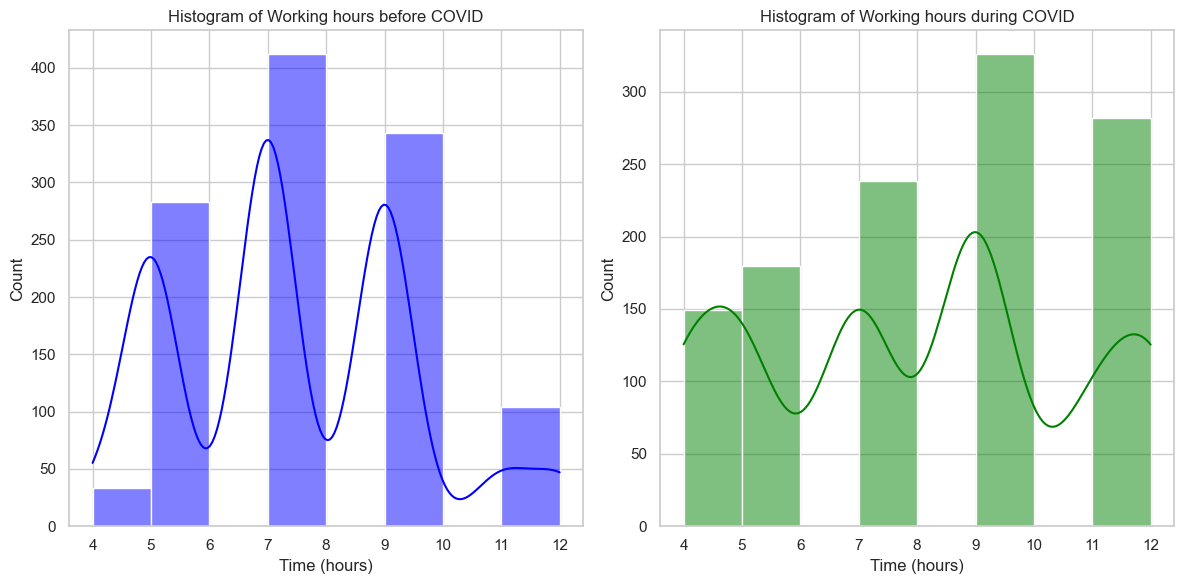

In [ ]:
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# First subplot for 'time_bp'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(psyco1['time_bp'], bins=8, color='blue', kde=True)
plt.title('Histogram of Working hours before COVID')
plt.xlabel('Time (hours)')
plt.ylabel('Count')

# Second subplot for 'time_dp'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(psyco1['time_dp'], bins=8, color='green', kde=True)
plt.title("Histogram of Working hours during COVID")
plt.xlabel('Time (hours)')
plt.ylabel('Count')

plt.tight_layout()  # Ensures subplots don't overlap

# Show the plots
plt.show()

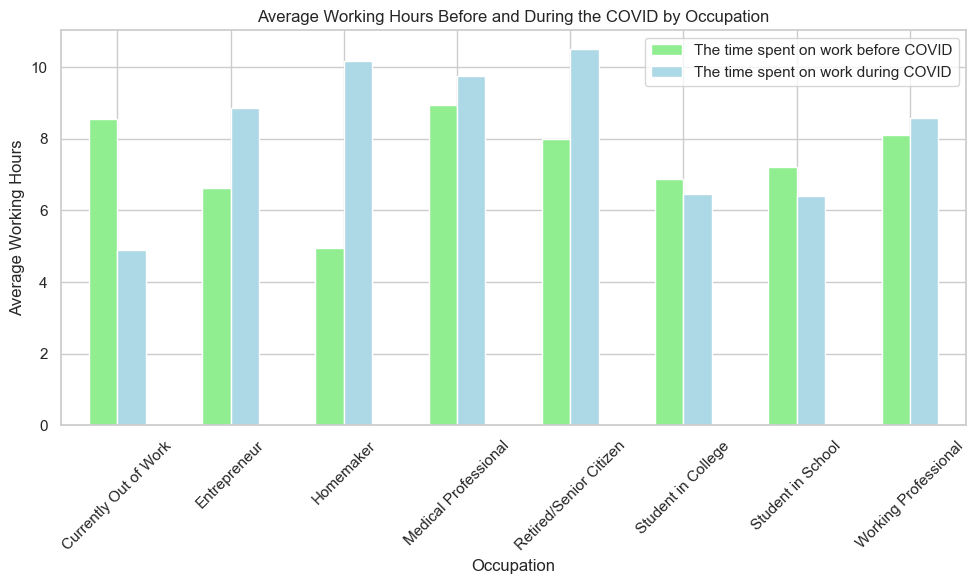

In [ ]:
time_dep = psyco1[['occupation', 'time_bp', 'time_dp']]
time_dep = time_dep.groupby('occupation').mean()
time_dep.plot(kind='bar', figsize=(10, 6), color=['lightgreen','lightblue'])
plt.xlabel('Occupation')
plt.ylabel('Average Working Hours')
plt.title('Average Working Hours Before and During the COVID by Occupation')
plt.xticks(rotation= 45)
plt.legend(['The time spent on work before COVID','The time spent on work during COVID'])
plt.tight_layout()
plt.show()

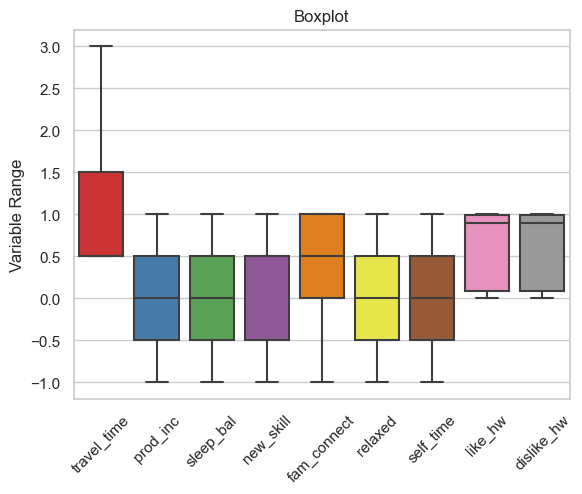

In [ ]:
list = ["travel_time","prod_inc","sleep_bal","new_skill","fam_connect","relaxed","self_time", "like_hw", "dislike_hw"]
sns.boxplot(psyco1.loc[:, list], orient = "v", palette = "Set1")
plt.ylabel('Variable Range')
plt.title('Boxplot')
plt.xticks(rotation= 45)
plt.show()

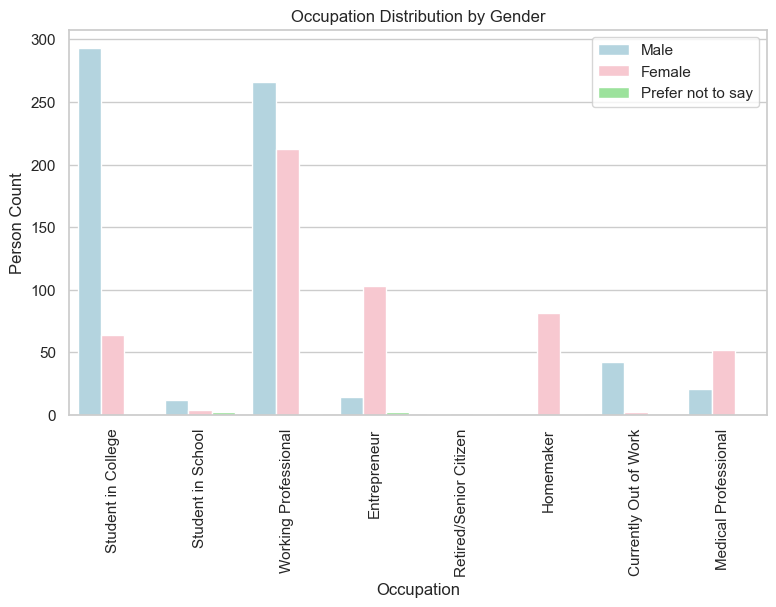

In [ ]:
fig= plt.subplots(figsize=(9, 5))
sns.countplot(x='occupation', hue='gender', data=psyco1, palette=['lightblue', 'pink','lightgreen'])
plt.title('Occupation Distribution by Gender')
plt.xlabel('Occupation')
plt.ylabel('Person Count')
plt.legend(['Male', 'Female','Prefer not to say'])
plt.xticks(rotation= 90)
plt.show()

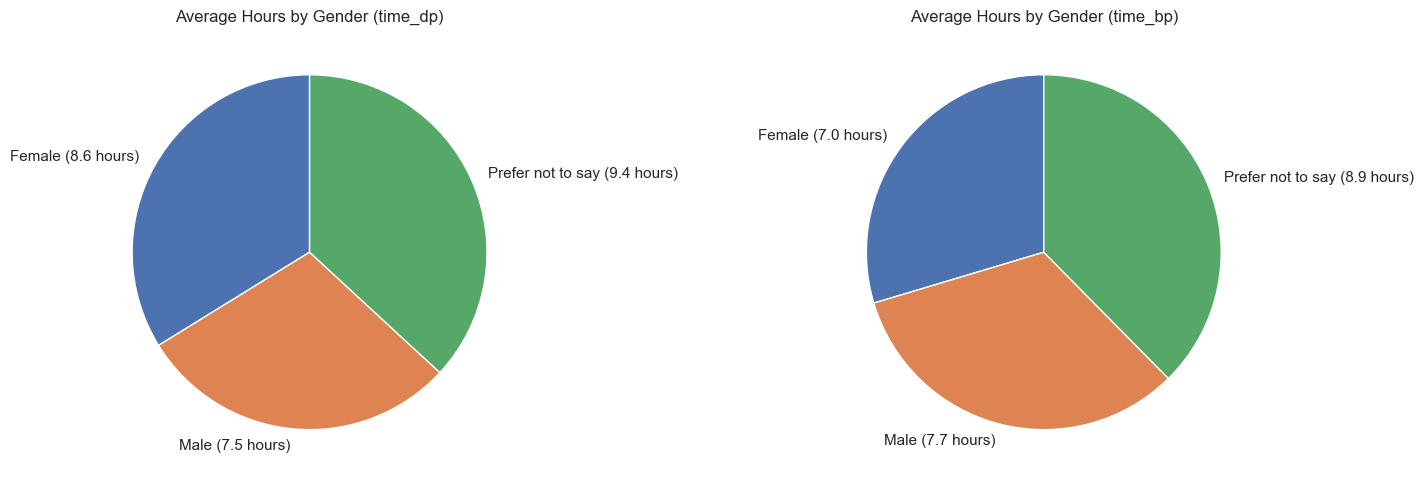

In [ ]:
average_hours_by_sex1 = psyco1.groupby('gender')['time_bp'].mean()
average_hours_by_sex = psyco1.groupby('gender')['time_dp'].mean()
plt.figure(figsize=(15, 5))

# Plot the first pie chart on the first subplot
plt.subplot(121)
plt.pie(average_hours_by_sex, labels=[f'{gender} ({average:.1f} hours)' for gender, average in average_hours_by_sex.items()], startangle=90)
plt.title('Average Hours by Gender (time_dp)')

# Plot the second pie chart on the second subplot
plt.subplot(122)
plt.pie(average_hours_by_sex1, labels=[f'{gender} ({average:.1f} hours)' for gender, average in average_hours_by_sex1.items()], startangle=90)
plt.title('Average Hours by Gender (time_bp)')

# Display the plots
plt.tight_layout()
plt.show()

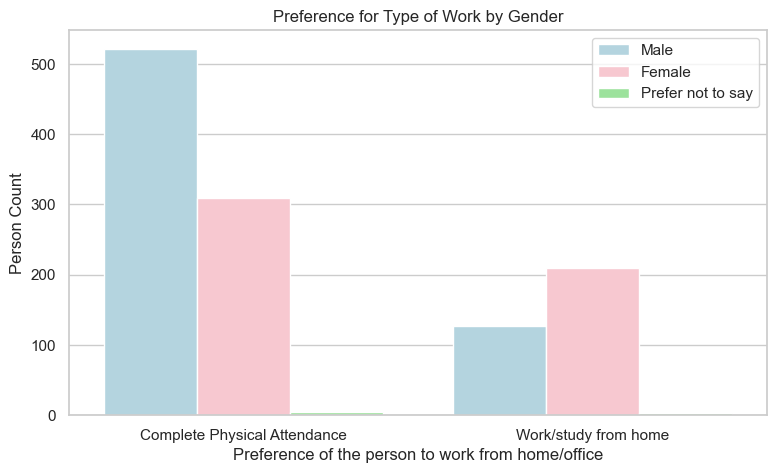

In [ ]:
fig= plt.subplots(figsize=(9, 5))
sns.countplot(x='prefer', hue='gender', data=psyco1, palette=['lightblue', 'pink','lightgreen'])
plt.title('Preference for Type of Work by Gender')
plt.xlabel('Preference of the person to work from home/office')
plt.ylabel('Person Count')
plt.legend(['Male', 'Female','Prefer not to say'])
plt.show()

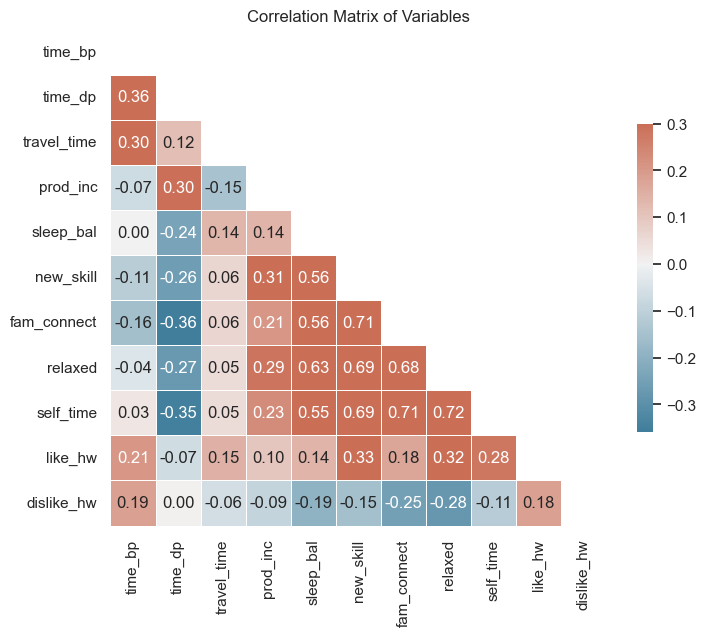

In [ ]:
list_numeric= ["time_bp","time_dp","travel_time","prod_inc","sleep_bal","new_skill","fam_connect","relaxed","self_time","like_hw","dislike_hw"]
numeric = psyco1.loc[:, list_numeric]
corr= numeric.corr()
mask= np.triu(np.ones_like(corr, dtype=bool))
f,ax= plt.subplots(figsize=(8, 8))
cmap= sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5}, fmt = ".2f")
plt.title('Correlation Matrix of Variables')
plt.show()